In [94]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import functions as f

In [95]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration yaml file not found!")

In [96]:
config['data']['raw']

{'final_demo': '../data/raw/df_final_demo.csv',
 'final_web_data_combined': '../data/raw/df_final_web_data_combined.csv',
 'final_experiment_clients': '../data/raw/df_final_experiment_clients.csv'}

___________________________________________________
**df_final_demo:** client_profile_df has information about the demographics of all clients based on their ID.

In [97]:
client_profile_df = pd.read_csv(config['data']['raw']['final_demo'], low_memory=False)
client_profile_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [98]:
# Retrieving the number of rows and columns in the dataframe
client_profile_df.shape

(70609, 9)

In [99]:
# Displaying the data types of each column in the dataframe
client_profile_df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [100]:
# Retrieving the unique data types present in the dataframe columns
list(set(client_profile_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [101]:
# Extracting column names with numerical data types from the dataframe
client_profile_df.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [102]:
# Counting and sorting the unique values for each numerical column in descending order
client_profile_df.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [103]:
client_profile_df.rename(columns = {'gendr':'gender'},inplace=True)

In [104]:
# Retrieving column names with object (typically string) data types from the dataframe
client_profile_df.select_dtypes("object").columns

Index(['gender'], dtype='object')

In [105]:
# Replace 'X' values with the mode of the other values
mode_gender = client_profile_df[client_profile_df['gender'] != 'X']['gender'].mode()[0]
client_profile_df['gender'] = client_profile_df['gender'].replace('X', mode_gender)

In [106]:
client_profile_df['gender'].unique()

array(['U', 'M', 'F', nan], dtype=object)

In [107]:
# Checking for missing data
client_profile_df.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gender              14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [108]:
# Identifying columns in the dataframe where over 80% of the values are missing
client_profile_df.columns[client_profile_df.isnull().mean() > 0.8]

Index([], dtype='object')

In [109]:
# checking Duplicates
client_profile_df.duplicated().sum()

0

In [110]:
# Dropping the null values
client_profile_df.dropna(inplace = True)

In [111]:
# Checking for missing data after dropping null values
client_profile_df.isnull().sum().sort_values(ascending=False)

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gender              0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [112]:
client_profile_df.shape

(70594, 9)

In [113]:
client_profile_df.to_csv('../data/cleaned/df_final_demo.csv', index=False)

____________________________________________________
**df_final_web_data_combined:** digital_fdigital_footprints_df has detailed information about their online interaction.


In [114]:
digital_footprints_df = pd.read_csv(config['data']['raw']['final_web_data_combined'], low_memory=False)
digital_footprints_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [115]:
# Retrieving the number of rows and columns in the dataframe
digital_footprints_df.shape

(755405, 5)

In [116]:
# Displaying the data types of each column in the dataframe
digital_footprints_df.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [117]:
# Retrieving the unique data types present in the dataframe columns
list(set(digital_footprints_df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [118]:
# Checking for missing data
digital_footprints_df.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [119]:
# checking Duplicates
digital_footprints_df.duplicated().sum()

10764

In [120]:
# Dropping duplicates
digital_footprints_df.drop_duplicates(inplace=True)

In [121]:
# checking Duplicates after dropping
digital_footprints_df.duplicated().sum()

0

In [122]:
digital_footprints_df.shape

(744641, 5)

In [123]:
# digital_footprints_df.to_csv('../data/cleaned/df_final_web_data_combined.csv')

_____________________________________________________________________
**df_final_experiment_clients:** Experiment Roster data frane has information about which clients were part of Test group and Control group

Control Group: Clients interacted with Vanguard’s traditional online process. (old)<br>
Test Group: Clients experienced the new, spruced-up digital interface. (new)

In [124]:
experiment_roster_df = pd.read_csv(config['data']['raw']['final_experiment_clients'], low_memory=False)
experiment_roster_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [125]:
experiment_roster_df.rename(columns = {'Variation':'variation'},inplace=True)

In [126]:
# Retrieving the number of rows and columns in the dataframe
experiment_roster_df.shape

(70609, 2)

In [127]:
# Displaying the data types of each column in the dataframe
experiment_roster_df.dtypes

client_id     int64
variation    object
dtype: object

In [128]:
# Checking for missing data
experiment_roster_df.isnull().sum().sort_values(ascending=False)

variation    20109
client_id        0
dtype: int64

In [129]:
# checking Duplicates
experiment_roster_df.duplicated().sum()

0

In [130]:
# Dropping the null values
experiment_roster_df.dropna(inplace = True)

In [131]:
# Checking for missing data
experiment_roster_df.isnull().sum().sort_values(ascending=False)

client_id    0
variation    0
dtype: int64

In [132]:
# Retrieving the number of rows and columns in the dataframe
experiment_roster_df.shape

(50500, 2)

In [133]:
f.print_in_red("Shape of client_profile DataFrame after cleaning:")
print(f"rows: {client_profile_df.shape[0]}\ncolumns: {client_profile_df.shape[1]}")

Shape of client_profile DataFrame after cleaning:
rows: 70594
columns: 9


In [134]:
f.print_in_red("Shape of digital_footprints DataFrame after cleaning:")
print(f"rows: {digital_footprints_df.shape[0]}\ncolumns: {digital_footprints_df.shape[1]}")

Shape of digital_footprints DataFrame after cleaning:
rows: 744641
columns: 5


In [135]:
f.print_in_red("Shape of experiment_roster DataFrame after cleaning:")
print(f"rows: {experiment_roster_df.shape[0]}\ncolumns: {experiment_roster_df.shape[1]}")

Shape of experiment_roster DataFrame after cleaning:
rows: 50500
columns: 2


In [136]:
experiment_roster_df.to_csv('../data/cleaned/df_final_experiment_clients.csv', index=False)

### Merge variation column from Experiment Roster (experiment_roster_df) to Client profile (client_profile_df) data frame

In [137]:
# Perform the merge operation
client_profile_df = client_profile_df.merge(experiment_roster_df[['client_id', 'variation']], on='client_id', how='left')
client_profile_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70590,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70591,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70592,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [138]:
client_profile_df.isnull().sum()

client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                0
gender                  0
num_accts               0
bal                     0
calls_6_mnth            0
logons_6_mnth           0
variation           20107
dtype: int64

In [139]:
# Dropping null values after merging eexperiment_roster_df to client_profile_df
client_profile_df.dropna(inplace=True)
client_profile_df.shape

(50487, 10)

In [140]:
client_profile_df.to_csv('../data/cleaned/df_final_demo_merged.csv')

# Analysis Starts here
## Client behaviour analysis

Average balance


149516.79

Average balance of Female


139082.03

Average balance of Male


212772.56

Average balance of Unknown gender


97303.68

Number of accounts held by gender 'F' with balance above average: 10106.0
Number of accounts held by gender 'F' with balance below average: 26118.0

Number of accounts held by gender 'M' with balance above average: 11079.0
Number of accounts held by gender 'M' with balance below average: 28380.0

Number of accounts held by gender 'U' with balance above average: 9389.0
Number of accounts held by gender 'U' with balance below average: 28755.0



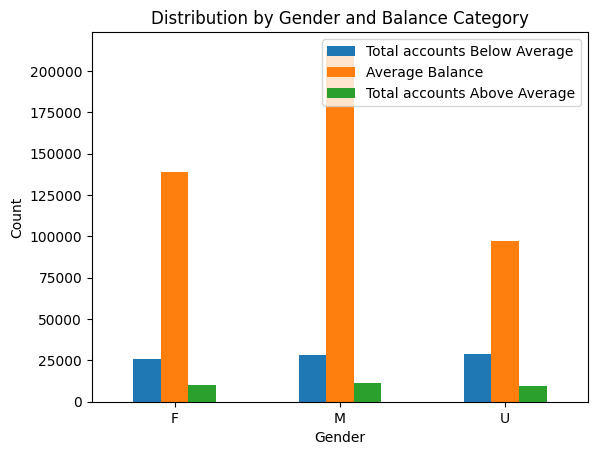

In [141]:
f.print_in_red('Average balance')
average_balance = client_profile_df['bal'].mean().round(2)
display(average_balance)

f.print_in_red('Average balance of Female')
average_balance_female = f.get_gender_average_balance(client_profile_df, 'F', 'bal')
display(average_balance_female)

f.print_in_red('Average balance of Male')
average_balance_male = f.get_gender_average_balance(client_profile_df, 'M', 'bal')
display(average_balance_male)

f.print_in_red('Average balance of Unknown gender')
average_balance_unknown = f.get_gender_average_balance(client_profile_df, 'U', 'bal')
display(average_balance_unknown)

f_above_average, f_below_average = f.get_number_accounts_above_and_below_average(client_profile_df, 'F', 'bal','num_accts')
f.print_in_red(f"Number of accounts held by gender 'F' with balance above average: {f_above_average}")
f.print_in_red(f"Number of accounts held by gender 'F' with balance below average: {f_below_average}\n")

m_above_average, m_below_average = f.get_number_accounts_above_and_below_average(client_profile_df, 'M', 'bal','num_accts')
f.print_in_red(f"Number of accounts held by gender 'M' with balance above average: {m_above_average}")
f.print_in_red(f"Number of accounts held by gender 'M' with balance below average: {m_below_average}\n")

u_above_average, u_below_average = f.get_number_accounts_above_and_below_average(client_profile_df, 'U', 'bal','num_accts')
f.print_in_red(f"Number of accounts held by gender 'U' with balance above average: {u_above_average}")
f.print_in_red(f"Number of accounts held by gender 'U' with balance below average: {u_below_average}\n")

data = {
    'total_accounts_below_average':[f_below_average,m_below_average,u_below_average],
    'average_balance':[average_balance_female,average_balance_male,average_balance_unknown],
    'total_accounts_above_average':[f_above_average,m_above_average,u_above_average],
}
genders= ['F','M','U']
df = pd.DataFrame(data,index=genders)

# Plotting the data
df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution by Gender and Balance Category')
plt.xticks(rotation=0)
plt.legend(['Total accounts Below Average', 'Average Balance', 'Total accounts Above Average'], loc='upper right')
plt.show()

In [142]:
f.print_in_red(f"Total number of female accounts: {f.get_gender_total_number_of_accounts(client_profile_df,'F')}")
f.print_in_red(f"Total number of male accounts: {f.get_gender_total_number_of_accounts(client_profile_df,'M')}")
f.print_in_red(f"Total number of unknown accounts: {f.get_gender_total_number_of_accounts(client_profile_df,'U')}")

Total number of female accounts: count    16258
Name: gender, dtype: int64
Total number of male accounts: count    16947
Name: gender, dtype: int64
Total number of unknown accounts: count    17282
Name: gender, dtype: int64


Gender Distribution of Process by Experiment type:
  variation gender  count
0   Control      F   7542
1   Control      M   7970
2   Control      U   8014
3      Test      F   8716
4      Test      M   8977
5      Test      U   9268


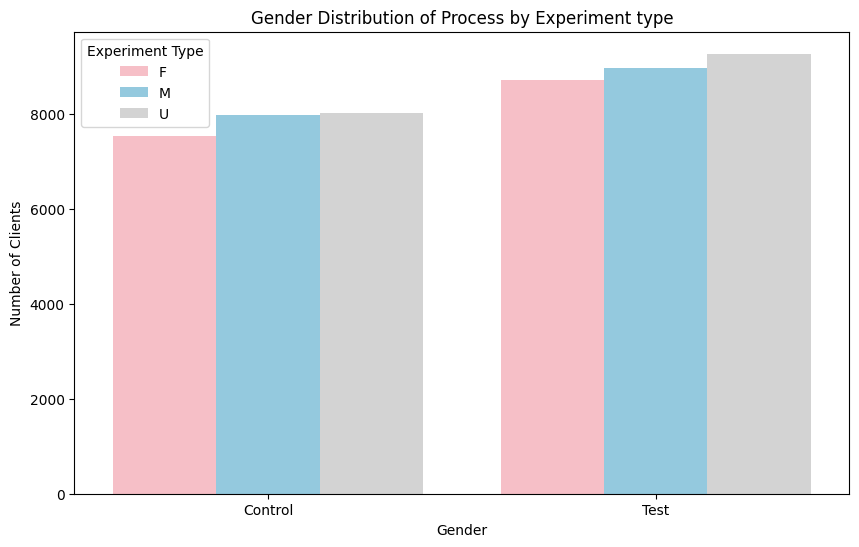

In [143]:

# Categorical vs Categorical Analysis
# Group by 'variation' and 'gender' and count the occurrences
title = "Gender Distribution of Process by Experiment type"
gender_variation_counts = client_profile_df.groupby(['variation', 'gender']).size().reset_index(name='count')

f.print_in_red(f"{title}:")
print(gender_variation_counts)

# Define a custom color palette for genders
custom_palette = {
    'M': 'skyblue',  # Set the color for M
    'F': 'lightpink',  # Set the color for F
    'U': 'lightgrey',  # Set the color for U
}


# Plotting the barplot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_variation_counts, x='variation', y='count', hue='gender', palette=custom_palette)

plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.title(title)
plt.legend(title='Experiment Type')
image_name=title.lower().replace(' ','_')
plt.savefig(f'../images/{image_name}.png')
plt.show()

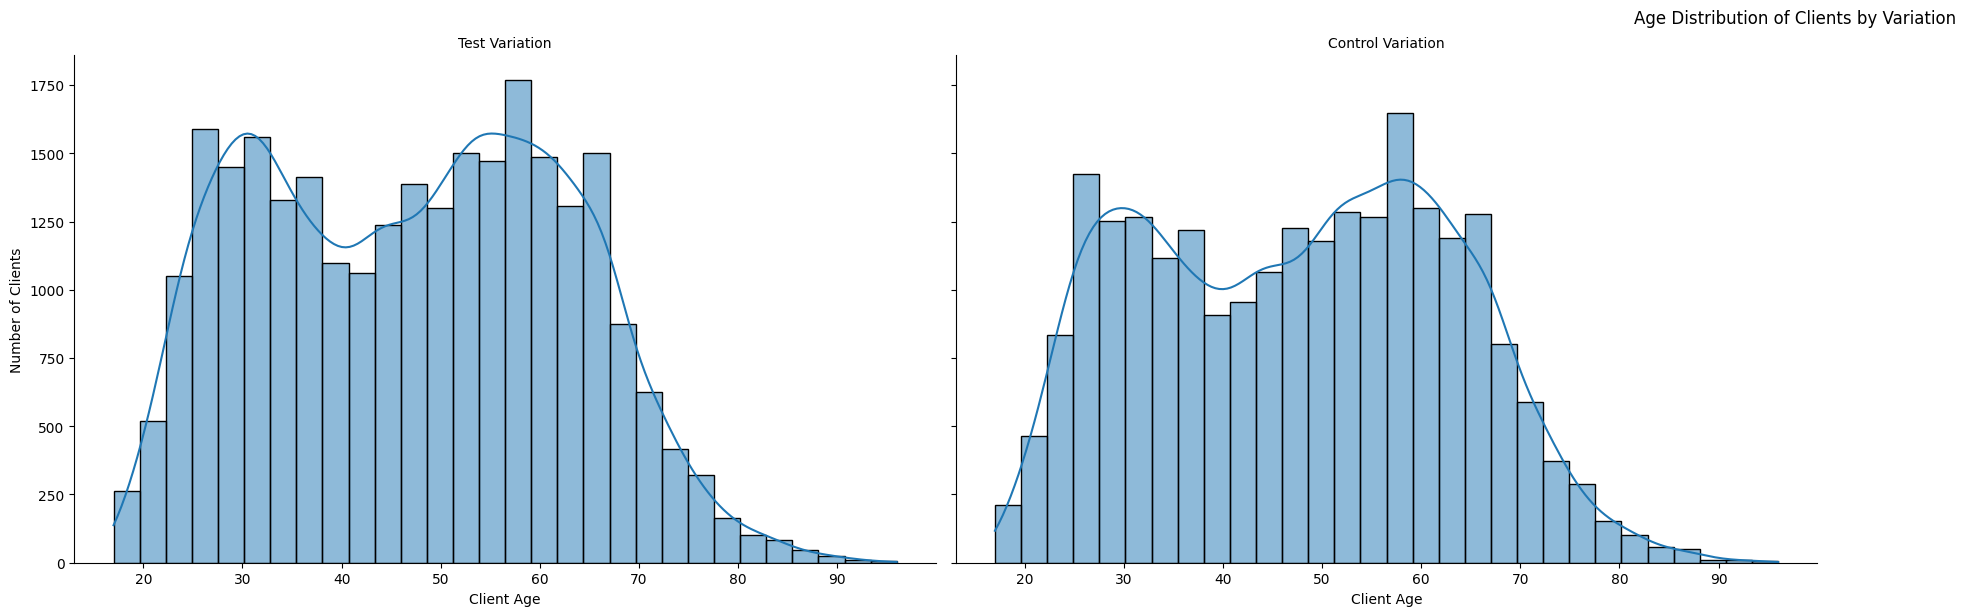

In [144]:
# Create a FacetGrid to plot the age distribution for each group in the 'variation' column
title = 'Age Distribution of Clients by Variation'
g = sns.FacetGrid(client_profile_df, col="variation", col_wrap=4, height=6, aspect=1.5)
g.map(sns.histplot, "clnt_age", kde=True, bins=30)

# Set the axis labels and title for each subplot
g.set_axis_labels("Client Age", "Number of Clients")
g.set_titles(col_template="{col_name} Variation")
g.fig.suptitle(title, y=1.02)
image_name=title.lower().replace(' ','_')
plt.savefig(f'../images/{image_name}.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\2337474159.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_count_by_variation_age = client_profile_df.groupby(['variation', 'age_groups'])['client_id'].count().reset_index()


,variation,age_groups,client_id
0,Control,0-20,275
1,Control,21-35,6296
2,Control,35-50,6060
3,Control,51-64,7582
4,Control,65-80,3080
5,Control,90+,217
6,Test,0-20,330
7,Test,21-35,7427
8,Test,35-50,6968
9,Test,51-64,8566


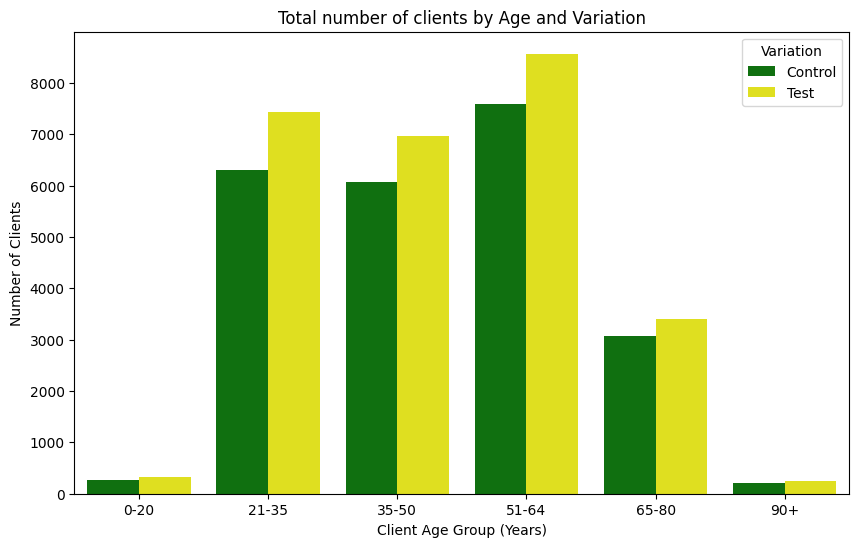

In [145]:
# Define the bins and labels for age groups
bins = [0, 20, 35, 50, 65, 80, 90]
labels = ['0-20','21-35','35-50','51-64','65-80','90+']

# Example tenure groups
client_profile_df['age_groups'] = pd.cut(client_profile_df['clnt_age'], bins=bins, labels=labels)

# Group by 'variation' and 'tenure_groups', and calculate client counts
client_count_by_variation_age = client_profile_df.groupby(['variation', 'age_groups'])['client_id'].count().reset_index()

display(client_count_by_variation_age)

# Define a custom color palette for genders
custom_palette = {
    'Control': 'green',  # Set the color for Control variation
    'Test': 'yellow',  # Set the color for Test variation
}
title = "Total number of clients by Age and Variation"
# Plot client count by age group for each variation (univariate analysis)
plt.figure(figsize=(10, 6))
sns.barplot(x='age_groups', y='client_id', hue='variation', data=client_count_by_variation_age, palette=custom_palette)
plt.xlabel("Client Age Group (Years)")
plt.ylabel("Number of Clients")
plt.title(title)
image_name = title.lower().replace(' ','_')
plt.legend(title='Variation')
plt.savefig(f"../images/{image_name}.png")
plt.show()

,variation,num_accts,client_id
0,Control,2.0,18410
1,Control,3.0,4251
2,Control,4.0,745
3,Control,5.0,108
4,Control,6.0,10
5,Control,7.0,2
6,Test,1.0,1
7,Test,2.0,21310
8,Test,3.0,4696
9,Test,4.0,840


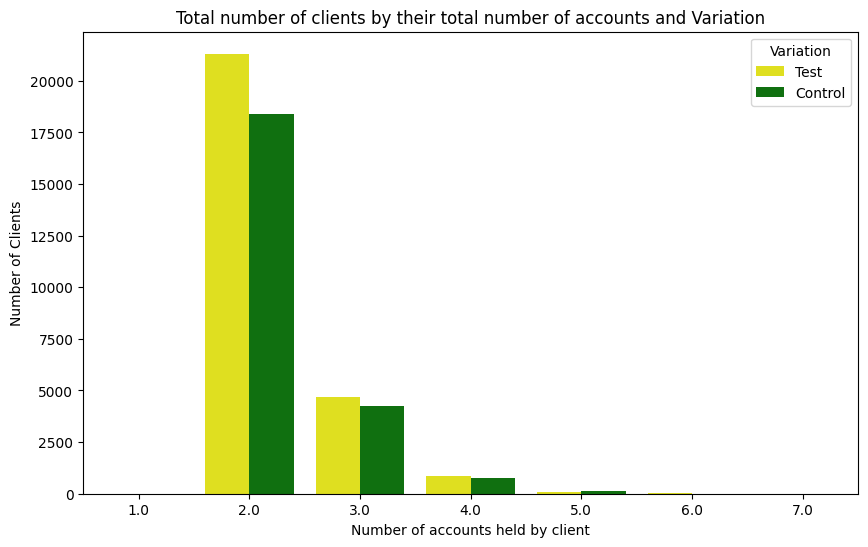

In [146]:
# Group by 'variation' and 'tenure_groups', and calculate client counts
client_count_by_variation_age = client_profile_df.groupby(['variation', 'num_accts'])['client_id'].count().reset_index()
display(client_count_by_variation_age)
title = "Total number of clients by their total number of accounts and Variation"
# Plot client count by age group for each variation (univariate analysis)
plt.figure(figsize=(10, 6))
sns.barplot(x='num_accts', y='client_id', hue='variation', data=client_count_by_variation_age, palette=custom_palette)
plt.xlabel("Number of accounts held by client")
plt.ylabel("Number of Clients")
plt.title(title)
image_name = title.lower().replace(' ','_')
plt.legend(title='Variation')
plt.savefig(f"../images/{image_name}.png")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\3274982492.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_count_by_tenure_group_yr = client_profile_df.groupby(['variation', 'tenure_groups'])['client_id'].count().reset_index()


,variation,tenure_groups,client_id
0,Control,Decade,11394
1,Control,2 Decades,8852
2,Control,3 Decades,2943
3,Control,4 Decades,314
4,Control,>=5 Decades,23
5,Test,Decade,13310
6,Test,2 Decades,9967
7,Test,3 Decades,3306
8,Test,4 Decades,349
9,Test,>=5 Decades,29


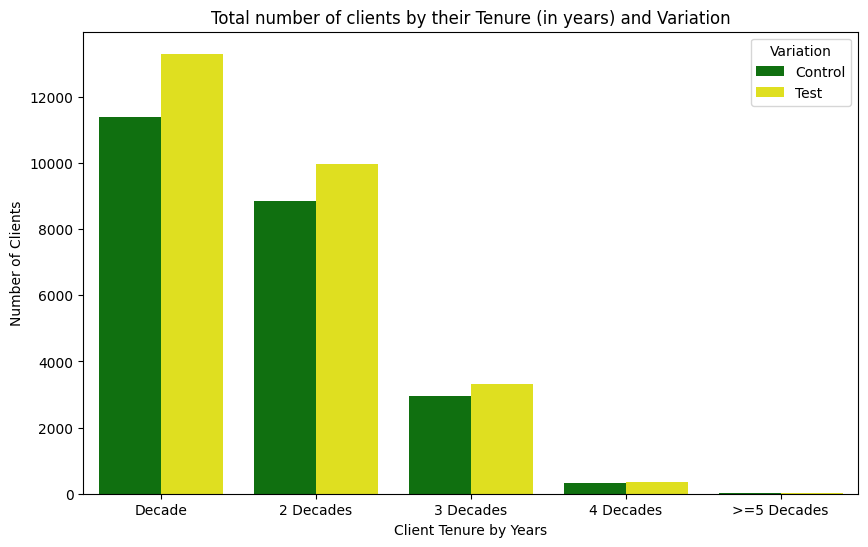

In [147]:
# Define the bins and labels for tenure by year 
bins =  [ 0, 10, 20, 30, 40, client_profile_df['clnt_tenure_yr'].max()]
labels = ['Decade','2 Decades','3 Decades','4 Decades','>=5 Decades']

# Example tenure by year groups
client_profile_df['tenure_groups'] = pd.cut(client_profile_df['clnt_tenure_yr'], bins=bins, labels=labels)

# Group by 'variation' and 'tenure_groups', and calculate client counts
client_count_by_tenure_group_yr = client_profile_df.groupby(['variation', 'tenure_groups'])['client_id'].count().reset_index()
display(client_count_by_tenure_group_yr)

title="Total number of clients by their Tenure (in years) and Variation"

# Plot client count by age group for each variation
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_groups', y='client_id', hue='variation', data=client_count_by_tenure_group_yr, palette=custom_palette)
plt.xlabel("Client Tenure by Years")
plt.ylabel("Number of Clients")
plt.title(title)
image_name = title.lower().replace(' ','_')
plt.legend(title='Variation')
plt.savefig(f"../images/{image_name}.png")
plt.show()

  variation  logons_6_mnth
0   Control       6.166242
1      Test       6.101851


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\3204180648.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='variation', y='logons_6_mnth', data=agg_df,errorbar=None, palette=custom_palette)


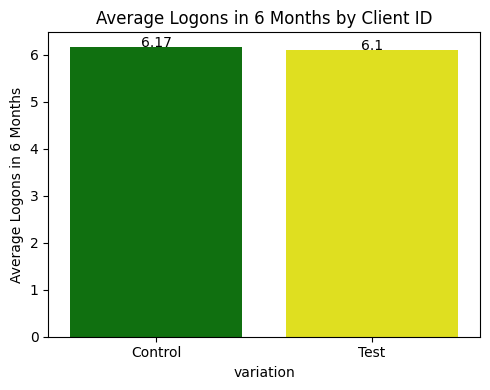

In [148]:
agg_df = client_profile_df.groupby('variation')['logons_6_mnth'].mean().reset_index()

# Display the aggregated DataFrame
print(agg_df.head())

# Create the bar plot
plt.figure(figsize=(5, 4))
barplot = sns.barplot(x='variation', y='logons_6_mnth', data=agg_df,errorbar=None, palette=custom_palette)

# Customize the plot
title = 'Average Logons in 6 Months by Client ID'
plt.title(title)
plt.xlabel('variation')
plt.ylabel('Average Logons in 6 Months')
plt.tight_layout()

# Annotate the mean values on the bar plot
for index, row in agg_df.iterrows():
    barplot.text(index, row['logons_6_mnth'], round(row['logons_6_mnth'], 2), color='black', ha="center")
image_name = title.lower().replace(' ','_')
plt.savefig(f"../images/{image_name}.png")
plt.show()

## Performance Metrics

### 1.1 Calculate completion rate for all clients

In [149]:
# Calculate Overall completion rate
total_start_visits = digital_footprints_df[digital_footprints_df['process_step'] == 'start']['client_id'].nunique()
total_confirm_visits = digital_footprints_df[digital_footprints_df['process_step'] == 'confirm']['client_id'].nunique()
overall_completion_rate = total_confirm_visits / total_start_visits
print(f"Overall Completion Rate: {overall_completion_rate:.2%}")

Overall Completion Rate: 68.20%


### 1.2 Calculate completion rate for Test Group clients

In [150]:
# Create df for Test group
test_roster_df = experiment_roster_df[experiment_roster_df['variation'] == 'Test']
print(f'Test category: {test_roster_df.shape}')

# Calculate Test group completion rate
test_df = digital_footprints_df.merge(test_roster_df, on='client_id', how='inner')
display(test_df.shape)
test_total_start_visits = test_df[test_df['process_step'] == 'start']['client_id'].nunique()
test_total_confirm_visits = test_df[test_df['process_step'] == 'confirm']['client_id'].nunique()
test_completion_rate = test_total_confirm_visits / test_total_start_visits
print(f"test_total_start_visits: {test_total_start_visits}")
print(f"test_total_confirm_visits: {test_total_confirm_visits}")
print(f"Test Group Completion Rate: {test_completion_rate:.2%}")

Test category: (26968, 2)


(176699, 6)

test_total_start_visits: 26679
test_total_confirm_visits: 18687
Test Group Completion Rate: 70.04%


### 1.3 Calculate completion rate for Control Group clients

In [151]:
# Create df for Control group
control_roster_df = experiment_roster_df[experiment_roster_df['variation'] == 'Control']
print(f'Control category: {control_roster_df.shape}')

# Calculate Control group completion rate
control_df = digital_footprints_df.merge(control_roster_df, on='client_id', how='inner')
control_total_start_visits = control_df[control_df['process_step'] == 'start']['client_id'].nunique()
control_total_confirm_visits = control_df[control_df['process_step'] == 'confirm']['client_id'].nunique()
control_completion_rate = control_total_confirm_visits / control_total_start_visits
print(f"Control Group Completion Rate: {control_completion_rate:.2%}")

Control category: (23532, 2)
Control Group Completion Rate: 65.97%


### 2. Calcualte time spent for steps

In [152]:
# Convert date_time to datetime format
digital_footprints_df['date_time'] = pd.to_datetime(digital_footprints_df['date_time'])

# Define the sort order for process_step 
process_step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Convert process_step to a categorical type with the specified order
digital_footprints_df['process_step'] = pd.Categorical(digital_footprints_df['process_step'], categories=process_step_order, ordered=True)

# Sort the dataframe by client_id, visit_id, process_step in ascending order and date_time in descending order
digital_footprints_df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], ascending=[True, True, True, True, False], inplace=True)

# Keep only the latest steps based on the process_step order and save it to a new data frame
updated_digital_footprints_df = digital_footprints_df.drop_duplicates(subset=['client_id', 'visitor_id', 'visit_id', 'process_step'], keep='first')

# Calculate time spent on each step from the new data frame 
updated_digital_footprints_df['time_spent'] = updated_digital_footprints_df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().shift(-1).dt.total_seconds()

display(updated_digital_footprints_df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\3311430487.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_digital_footprints_df['time_spent'] = updated_digital_footprints_df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().shift(-1).dt.total_seconds()


,client_id,visitor_id,visit_id,process_step,date_time,time_spent
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,9.0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,46.0
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,94.0
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,64.0
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaN
...,...,...,...,...,...,...
648534,9999875,738878760_1556639849,931268933_219402947_599432,start,2017-06-01 22:40:01,87.0
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,19.0
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,191.0
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,221.0


### 2.1 Average time spent on each step for all clients

In [153]:
# Aggregate average time spent per step
avg_time_spent = updated_digital_footprints_df.groupby('process_step')['time_spent'].mean().round(2)
f.print_in_red("Average Time Spent on Each Step by all clients")
display(avg_time_spent)

Average Time Spent on Each Step by all clients


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\176729980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_spent = updated_digital_footprints_df.groupby('process_step')['time_spent'].mean().round(2)


process_step
start        9.54
step_1      37.39
step_2      97.50
step_3     142.69
confirm       NaN
Name: time_spent, dtype: float64

### 2.2 Average time spent on each step for Test group clients

In [154]:
updated_digital_footprints_test_group_df = updated_digital_footprints_df.merge(test_roster_df, on='client_id', how='inner')

# Aggregate average time spent per step
avg_time_spent_test = updated_digital_footprints_test_group_df.groupby('process_step')['time_spent'].mean().round(2)
f.print_in_red("Average Time Spent on Each Step by Test group clients")
display(avg_time_spent_test)

Average Time Spent on Each Step by Test group clients


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\1273786672.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_spent_test = updated_digital_footprints_test_group_df.groupby('process_step')['time_spent'].mean().round(2)


process_step
start        3.27
step_1      37.73
step_2      92.92
step_3     143.38
confirm       NaN
Name: time_spent, dtype: float64

### 2.3 Average time spent on each step for Control group clients

In [155]:
updated_digital_footprints_control_group_df = updated_digital_footprints_df.merge(control_roster_df, on='client_id', how='inner')

# Aggregate average time spent per step
avg_time_spent_control = updated_digital_footprints_control_group_df.groupby('process_step')['time_spent'].mean().round(2)
f.print_in_red("Average Time Spent on Each Step by Test group clients")
display(avg_time_spent_control)

Average Time Spent on Each Step by Test group clients


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\2613129824.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_spent_control = updated_digital_footprints_control_group_df.groupby('process_step')['time_spent'].mean().round(2)


process_step
start       19.25
step_1      34.62
step_2      94.94
step_3     135.73
confirm       NaN
Name: time_spent, dtype: float64

### 3 Calcualte time spent for the entire process from start to confirm

In [156]:
# Filter the dataframe to get only the 'start' and 'confirm' steps
updated_digital_footprints_df_filtered = updated_digital_footprints_df[updated_digital_footprints_df['process_step'].isin(['start', 'confirm'])]
updated_digital_footprints_df_filtered['total_time_spent'] = updated_digital_footprints_df_filtered.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\1186599005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_digital_footprints_df_filtered['total_time_spent'] = updated_digital_footprints_df_filtered.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().dt.total_seconds()


### 3.1 Average time spent for the entire process from start to confirm for all clients

In [157]:
f.print_in_red("Average Time Spent by all clients to finish entire process")
display(updated_digital_footprints_df_filtered['total_time_spent'].mean().round(2))

Average Time Spent by all clients to finish entire process


320.25

### 3.2 Average time spent for the entire process from start to confirm by Test group

In [158]:
updated_digital_footprints_df_filtered_test_group = updated_digital_footprints_df_filtered.merge(test_roster_df, on='client_id', how='inner')
f.print_in_red("Average Time Spent by Test group clients to finish entire process")
display(updated_digital_footprints_df_filtered_test_group['total_time_spent'].mean().round(2))

Average Time Spent by Test group clients to finish entire process


315.32

### 3.3 Average time spent for the entire process from start to confirm by Control group

In [159]:
updated_digital_footprints_df_filtered_control_group = updated_digital_footprints_df_filtered.merge(control_roster_df, on='client_id', how='inner')
f.print_in_red("Average Time Spent by Control group clients to finish entire process")
display(updated_digital_footprints_df_filtered_control_group['total_time_spent'].mean().round(2))

Average Time Spent by Control group clients to finish entire process


311.31

### 4.1 How far have all clients gone in the process?

This is where we check if clients stopped going to further steps during the process.

In [160]:
# Get the farthest step for each client_id
farthest_steps_df = digital_footprints_df.groupby(['client_id']).apply(f.get_furthest_step).reset_index()
farthest_steps_df.columns = ['client_id', 'farthest_step']
display(farthest_steps_df.shape)

# Calculate the number of users who dropped off at each step
farthest_step_count = farthest_steps_df['farthest_step'].value_counts().reindex(process_step_order, fill_value=0)
f.print_in_red("Farthest step Counts at Each Step of all clients:")
print(farthest_step_count)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29300\3021050171.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  farthest_steps_df = digital_footprints_df.groupby(['client_id']).apply(f.get_furthest_step).reset_index()


(120157, 2)

Farthest step Counts at Each Step of all clients:
farthest_step
start      14490
step_1      7858
step_2      6059
step_3     10605
confirm    81145
Name: count, dtype: int64


### 4.2 How far have Test group clients gone in the process?

At what steps did clients in Test group stop going further in the process.

In [259]:
test_farthest_steps_df = farthest_steps_df.merge(test_roster_df, on='client_id', how='inner')
display(test_farthest_steps_df.shape)

# Calculate the number of test group users who dropped off at each step
drop_off_counts = test_farthest_steps_df['farthest_step'].value_counts().reindex(process_step_order, fill_value=0)
f.print_in_red("Drop-off Counts at Each Step of Test group clients:")
print(drop_off_counts)

,client_id,farthest_step,variation
0,555,confirm,Test
1,647,confirm,Test
2,934,start,Test
3,1336,confirm,Test
4,1346,step_3,Test
...,...,...,...
26963,9999150,step_1,Test
26964,9999400,confirm,Test
26965,9999626,step_1,Test
26966,9999729,confirm,Test


Drop-off Counts at Each Step of Test group clients:
farthest_step
start       2454
step_1      1980
step_2      1411
step_3      2436
confirm    18687
Name: count, dtype: int64


### 4.3 How far have Control group clients gone in the process?

At what steps did clients in Control group stop going further in the process.

In [162]:
control_farthest_steps_df = farthest_steps_df.merge(control_roster_df, on='client_id', how='inner')
display(control_farthest_steps_df.shape)

# Calculate the number of control group users who dropped off at each step
drop_off_counts = control_farthest_steps_df['farthest_step'].value_counts().reindex(process_step_order, fill_value=0)
f.print_in_red("Drop-off Counts at Each Step of Control Group clients:")
print(drop_off_counts)

(23532, 3)

Drop-off Counts at Each Step of Control Group clients:
farthest_step
start       3285
step_1      1455
step_2      1265
step_3      2093
confirm    15434
Name: count, dtype: int64


### 5. Error Rates

### 5.1 Error rates for all clients

In [163]:
# Count instances where a user moves back to a previous step
process_step_count = digital_footprints_df.groupby(['client_id', 'visit_id', 'visitor_id'])['process_step'].count().reset_index()

# Total steps
total_steps = process_step_count['process_step'].sum()

unique_clients = digital_footprints_df['client_id'].nunique()
expected_steps = len(process_step_order) * unique_clients
extra_steps = total_steps - expected_steps
error_rate = (extra_steps/total_steps)

# Error rate
print(f'Error Rate: {error_rate:.2%}')

Error Rate: 19.32%


### 5.1 Error rates for Test group clients

In [164]:
# Count instances where a user moves back to a previous step
process_step_count = test_df.groupby(['client_id', 'visit_id', 'visitor_id'])['process_step'].count().reset_index()

# Total steps
total_steps = process_step_count['process_step'].sum()

unique_clients = test_df['client_id'].nunique()
expected_steps = len(process_step_order) * unique_clients
extra_steps = total_steps - expected_steps
error_rate = (extra_steps/total_steps)

# Error rate
print(f'Error Rate: {error_rate:.2%}')

Error Rate: 23.69%


### 5.1 Error rates for Control group clients

In [165]:
# Count instances where a user moves back to a previous step
process_step_count = control_df.groupby(['client_id', 'visit_id', 'visitor_id'])['process_step'].count().reset_index()

# Total steps
total_steps = process_step_count['process_step'].sum()

unique_clients = control_df['client_id'].nunique()
expected_steps = len(process_step_order) * unique_clients
extra_steps = total_steps - expected_steps
error_rate = (extra_steps/total_steps)

# Error rate
print(f'Error Rate: {error_rate:.2%}')

Error Rate: 16.28%


## Hypothesis testing - Two-proportion z-test

In [166]:
from statsmodels.stats.proportion import proportions_ztest

# Number of clients and number of completions for Test group
n_test = test_total_start_visits
completed_test = test_total_confirm_visits

# Number of clients and number of completions for Control group
n_control = control_total_start_visits
completed_control = control_total_confirm_visits

# Perform the z-test
count = np.array([completed_test, completed_control])
nobs = np.array([n_test, n_control])

# Calculate the z-statistic and p-value
z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05

if p_value < alpha:
    print(f"\nReject Null Hypothesis. There is a statistically significant difference in completion rates between the Test and Control groups.")
else:
    print(f"\nAccept Null Hypothesis. There is no statistically significant difference in completion rates between the Test and Control groups.")

Z-statistic: 9.7720
P-value: 0.0000

Reject Null Hypothesis. There is a statistically significant difference in completion rates between the Test and Control groups.


## Completion Rate with a Cost-Effectiveness Threshold

In [167]:
from scipy.stats import norm

# Calculate the completion rate for the Control group increased by 5%
control_completion_rate_increase = control_completion_rate * 1.05

# Number of clients and number of completions for Test group
n_test = test_total_start_visits
completed_test = test_total_confirm_visits

# Perform the one-sided two-proportion z-test
p1 = test_completion_rate
p0 = control_completion_rate_increase
n1 = n_test
n0 = control_total_start_visits

# Calculate z-statistic
z_stat = (p1 - p0) / np.sqrt(p0 * (1 - p0) / n0)

# Calculate p-value
p_value = 1 - norm.cdf(z_stat)

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Completion Rate with Cost-Effectiveness Threshold")
print(f"Null Hypothesis (H0): The completion rate for the Test group is equal to or less than the completion rate for the Control group increased by 5%.")
print(f"Alternative Hypothesis (Ha): The completion rate for the Test group is greater than the completion rate for the Control group increased by 5%.")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject Null Hypothesis. The completion rate for the Test group is significantly greater than the completion rate for the Control group increased by 5%.")
else:
    print(f"\nAccept Null Hypothesis. The completion rate for the Test group is not significantly greater than the completion rate for the Control group increased by 5%.")


Hypothesis Testing - Completion Rate with Cost-Effectiveness Threshold
Null Hypothesis (H0): The completion rate for the Test group is equal to or less than the completion rate for the Control group increased by 5%.
Alternative Hypothesis (Ha): The completion rate for the Test group is greater than the completion rate for the Control group increased by 5%.
Z-statistic: 2.5853
P-value: 0.0049

Reject Null Hypothesis. The completion rate for the Test group is significantly greater than the completion rate for the Control group increased by 5%.


## Other Hypothesis

### Hypothesis Testing - Average Age

In [168]:
from scipy import stats

# Calculate average age for Test and Control groups
avg_age_test = client_profile_df[client_profile_df['variation']=='Test']['clnt_age'].mean()
avg_age_control = client_profile_df[client_profile_df['variation']=='Control']['clnt_age'].mean()

# Perform Two sample T-test
t_stat, p_value = stats.ttest_ind(client_profile_df[client_profile_df['variation']=='Test']['clnt_age'], client_profile_df[client_profile_df['variation']=='Control']['clnt_age'], equal_var=False)

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Average Age")
print(f"Null Hypothesis (H0): The average age of clients engaging with the new process is equal to the average age of clients engaging with the old process.")
print(f"Alternative Hypothesis (Ha): The average age of clients engaging with the new process is not equal to the average age of clients engaging with the old process.")
print(f"Average Age - Test Group: {avg_age_test:.2f}")
print(f"Average Age - Control Group: {avg_age_control:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > alpha:
    print(f"\nAccept Null Hypothesis. The average age of clients engaging with the new process is the same as the average age of clients engaging with the old process.")
else:
    print(f"\nReject Null Hypothesis. The average age of clients engaging with the new process is different from the average age of clients engaging with the old process.")


Hypothesis Testing - Average Age
Null Hypothesis (H0): The average age of clients engaging with the new process is equal to the average age of clients engaging with the old process.
Alternative Hypothesis (Ha): The average age of clients engaging with the new process is not equal to the average age of clients engaging with the old process.
Average Age - Test Group: 47.16
Average Age - Control Group: 47.50
T-statistic: -2.4161
P-value: 0.0157

Reject Null Hypothesis. The average age of clients engaging with the new process is different from the average age of clients engaging with the old process.


### Hypothesis Testing - Standard Deviation of Ages

In [169]:
from scipy.stats import f as fss

# Calculate standard deviation for Test and Control groups
std_dev_test = client_profile_df[client_profile_df['variation']=='Test']['clnt_age'].std()
std_dev_control = client_profile_df[client_profile_df['variation']=='Control']['clnt_age'].std()

# Calculate the variances
var_test = client_profile_df[client_profile_df['variation']=='Test']['clnt_age'].var()
var_control = client_profile_df[client_profile_df['variation']=='Control']['clnt_age'].var()

# Perform F-test
f_stat = var_test / var_control
dfn = len(test_df) - 1  # degrees of freedom for the numerator
dfd = len(control_df) - 1  # degrees of freedom for the denominator
p_value = 1 - fss.cdf(f_stat, dfn, dfd)

# Two-tailed test
p_value *= 2

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Standard Deviation of Ages")
print(f"Null Hypothesis (H0): The standard deviation of ages of clients engaging with the new process is equal to the standard deviation of ages of clients engaging with the old process.")
print(f"Alternative Hypothesis (Ha): The standard deviation of ages of clients engaging with the new process is not equal to the standard deviation of ages of clients engaging with the old process.")
print(f"Standard Deviation - Test Group: {std_dev_test:.2f}")
print(f"Standard Deviation - Control Group: {std_dev_control:.2f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject Null Hypothesis. The standard deviation of ages of clients engaging with the new process is different from the standard deviation of ages of clients engaging with the old process.")
else:
    print(f"\nAccept Null Hypothesis. The standard deviation of ages of clients engaging with the new process is the same as the standard deviation of ages of clients engaging with the old process.")


Hypothesis Testing - Standard Deviation of Ages
Null Hypothesis (H0): The standard deviation of ages of clients engaging with the new process is equal to the standard deviation of ages of clients engaging with the old process.
Alternative Hypothesis (Ha): The standard deviation of ages of clients engaging with the new process is not equal to the standard deviation of ages of clients engaging with the old process.
Standard Deviation - Test Group: 15.51
Standard Deviation - Control Group: 15.52
F-statistic: 0.9991
P-value: 1.1482

Accept Null Hypothesis. The standard deviation of ages of clients engaging with the new process is the same as the standard deviation of ages of clients engaging with the old process.


### Hypothesis Testing - Average Client Tenure

In [170]:
# Calculate average tenure for Test and Control groups
avg_tenure_test = client_profile_df[client_profile_df['variation']=='Test']['clnt_tenure_yr'].mean()
avg_tenure_control = client_profile_df[client_profile_df['variation']=='Control']['clnt_tenure_yr'].mean()

# Perform Two sample T-test
t_stat, p_value = stats.ttest_ind(client_profile_df[client_profile_df['variation']=='Test']['clnt_tenure_yr'], client_profile_df[client_profile_df['variation']=='Control']['clnt_tenure_yr'], equal_var=False)

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Average Client Tenure")
print(f"Null Hypothesis (H0): The average client tenure of clients engaging with the new process is equal to the average client tenure of clients engaging with the old process.")
print(f"Alternative Hypothesis (Ha): The average client tenure of clients engaging with the new process is not equal to the average client tenure of clients engaging with the old process.")
print(f"Average Tenure - Test Group: {avg_tenure_test:.2f}")
print(f"Average Tenure - Control Group: {avg_tenure_control:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject Null Hypothesis. The average client tenure of clients engaging with the new process is different from the average client tenure of clients engaging with the old process.")
else:
    print(f"\nAccept Null Hypothesis. The average client tenure of clients engaging with the new process is the same as the average client tenure of clients engaging with the old process.")


Hypothesis Testing - Average Client Tenure
Null Hypothesis (H0): The average client tenure of clients engaging with the new process is equal to the average client tenure of clients engaging with the old process.
Alternative Hypothesis (Ha): The average client tenure of clients engaging with the new process is not equal to the average client tenure of clients engaging with the old process.
Average Tenure - Test Group: 11.98
Average Tenure - Control Group: 12.09
T-statistic: -1.7143
P-value: 0.0865

Accept Null Hypothesis. The average client tenure of clients engaging with the new process is the same as the average client tenure of clients engaging with the old process.


### Hypothesis Testing - Gender Differences

In [171]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(client_profile_df['gender'], client_profile_df['variation'])
display(contingency_table)

# Perform Chi-square test for independence
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Gender Differences")
print(f"Null Hypothesis (H0): The proportion of each gender engaging with the new process is equal to the proportion of each gender engaging with the old process.")
print(f"Alternative Hypothesis (Ha): The proportion of each gender engaging with the new process is not equal to the proportion of each gender engaging with the old process.")
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject Null Hypothesis. There are significant gender differences in engagement with the new and old processes.")
else:
    print(f"\nAccept Null Hypothesis. There are no significant gender differences in engagement with the new and old processes.")

variation,Control,Test
gender,,
F,7542,8716
M,7970,8977
U,8014,9268



Hypothesis Testing - Gender Differences
Null Hypothesis (H0): The proportion of each gender engaging with the new process is equal to the proportion of each gender engaging with the old process.
Alternative Hypothesis (Ha): The proportion of each gender engaging with the new process is not equal to the proportion of each gender engaging with the old process.
Chi-square Statistic: 1.9039
P-value: 0.3860

Accept Null Hypothesis. There are no significant gender differences in engagement with the new and old processes.


### Hypothesis testing - Average time spent on each step

In [264]:
import pandas as pd
from scipy.stats import f_oneway

# Merge datasets with test and control rosters
updated_digital_footprints_test_group_df = updated_digital_footprints_df.merge(test_roster_df, on='client_id', how='inner')
updated_digital_footprints_control_group_df = updated_digital_footprints_df.merge(control_roster_df, on='client_id', how='inner')

# Conduct t-tests for each process step
process_steps = updated_digital_footprints_df['process_step'].unique()
# Significance level
alpha = 0.05

for step in process_steps:
    if step == 'confirm':
        continue
    
    test_group_times = updated_digital_footprints_test_group_df[updated_digital_footprints_test_group_df['process_step'] == step]['time_spent']
    control_group_times = updated_digital_footprints_control_group_df[updated_digital_footprints_control_group_df['process_step'] == step]['time_spent']
    
    f_stat, p_value = f_oneway(test_group_times.dropna(), control_group_times.dropna())
    if p_value < alpha:
        print(f'step: {step}, p_value: {p_value:.2f}')
        print('Reject Null hypothesis: Significant difference in the average time spent on that process step between the test and control groups.')
    else:
        print(f'step: {step}, p_value: {p_value:.2f}')
        print('Accept Null hypothesis: No significant difference in the average time spent on that process step between the test and control groups.')

# Convert results to DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the results
print("ANOVA Test Results for Each Process Step")
display(anova_results_df)


step: start, p_value: 0.00
Reject Null hypothesis: Significant difference in the average time spent on that process step between the test and control groups.
step: step_1, p_value: 0.09
Accept Null hypothesis: No significant difference in the average time spent on that process step between the test and control groups.
step: step_2, p_value: 0.29
Accept Null hypothesis: No significant difference in the average time spent on that process step between the test and control groups.
step: step_3, p_value: 0.02
Reject Null hypothesis: Significant difference in the average time spent on that process step between the test and control groups.
ANOVA Test Results for Each Process Step


,process_step,f_stat,p_value
0,start,43.079372,5.306068e-11
1,step_1,2.847567,9.151931e-02
2,step_2,1.140284,2.855988e-01
3,step_3,5.300121,2.133001e-02
4,confirm,NaN,NaN


### Hypothesis testing - Farthest step

In [261]:
import pandas as pd
from scipy.stats import f_oneway

# Merge datasets with test and control rosters
test_farthest_steps_df = farthest_steps_df.merge(test_roster_df, on='client_id', how='inner')
control_farthest_steps_df = farthest_steps_df.merge(control_roster_df, on='client_id', how='inner')
display(test_farthest_steps_df)

# Conduct t-tests for each process step
process_steps = test_farthest_steps_df['process_step'].unique()
# Significance level
alpha = 0.05

for step in process_steps:  
    test_group_times = test_farthest_steps_df['farthest_step']
    control_group_times = control_farthest_steps_df['farthest_step']
    
    f_stat, p_value = f_oneway(test_group_times, control_group_times)
    if p_value < alpha:
        print(f'step: {step}')
        print('Reject Null hypothesis: Significant difference in the average time spent on that process step between the test and control groups.')
    else:
        print(f'step: {step}')
        print('Accept Null hypothesis: No significant difference in the average time spent on that process step between the test and control groups.')

# Convert results to DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the results
print("ANOVA Test Results for Each Process Step")
display(anova_results_df)

,client_id,farthest_step,variation
0,555,confirm,Test
1,647,confirm,Test
2,934,start,Test
3,1336,confirm,Test
4,1346,step_3,Test
...,...,...,...
26963,9999150,step_1,Test
26964,9999400,confirm,Test
26965,9999626,step_1,Test
26966,9999729,confirm,Test


KeyError: 'process_step'

### Hypothesis testing - Average time spent on entire process

In [250]:
updated_digital_footprints_df_filtered_test_group = updated_digital_footprints_df_filtered.merge(test_roster_df, on='client_id', how='inner')
updated_digital_footprints_df_filtered_control_group = updated_digital_footprints_df_filtered.merge(control_roster_df, on='client_id', how='inner')

# Perform Two sample T-test
t_stat, p_value = stats.ttest_ind(updated_digital_footprints_df_filtered_test_group['total_time_spent'].dropna(), updated_digital_footprints_df_filtered_control_group['total_time_spent'].dropna(), equal_var=False)

# Significance level
alpha = 0.05

# Print results of the hypothesis test
print("\nHypothesis Testing - Average Time spent on entire process")
print(f"Null Hypothesis (H0): There is no significant difference in the total time spent between the test group and the control group. This implies that the mean total time spent is the same for both groups.")
print(f"Alternative Hypothesis (Ha): There is a significant difference in the total time spent between the test group and the control group. This implies that the mean total time spent is different between the two groups.")
print(f"Average Time spent on entire process - Test Group: {updated_digital_footprints_df_filtered_test_group['total_time_spent'].mean().round(2):.2f}")
print(f"Average Time spent on entire process - Control Group: {updated_digital_footprints_df_filtered_control_group['total_time_spent'].mean().round(2):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject the null hypothesis, suggesting a significant difference in the total time spent between the test and control groups.")
else:
    print(f"\nAccept the null hypothesis, indicating no significant difference in the total time spent between the test and control groups.")


Hypothesis Testing - Average Time spent on entire process
Null Hypothesis (H0): There is no significant difference in the total time spent between the test group and the control group. This implies that the mean total time spent is the same for both groups.
Alternative Hypothesis (Ha): There is a significant difference in the total time spent between the test group and the control group. This implies that the mean total time spent is different between the two groups.
Average Time spent on entire process - Test Group: 315.32
Average Time spent on entire process - Control Group: 311.31
T-statistic: 0.9291
P-value: 0.3529

Accept the null hypothesis, indicating no significant difference in the total time spent between the test and control groups.


## Experiment Evaluation
### Design Effectiveness
#### Was the experiment well-structured?
Strengths:<br>
Control and Test Groups: The experiment is designed to have a control group and a test group, which is fundamental for A/B testing and comparing the impact of changes.<br>
Key Performance Indicators (KPIs): The KPIs such as completion rate, time spent on each step, and error rates are relevant and well-defined.<br>
Data Preparation: The instructions for sorting and cleaning the data ensure that only relevant and unique process steps are considered, which improves the reliability of the analysis. Also, the NaN values in the db_final_experiment_clients.csv file should have been properly populated or given correct variation values instead of leaving them empty<br>
#### Were clients randomly and equally divided between the old and new designs?
By looking at the client behaviour analysis section above and also seeing the results of the hypothesis analysis we can say that the clients were equally divided. 
#### Were there any biases?
By looking at the client behaviour analysis section above and also seeing the results of the hypothesis analysis we can say that there were no biases to be seen.
### Duration Assessment
#### Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?
Timeframe in general of more than 3 months seem to be good. Needs more analysis on `logons_6_mnth`<br>
**TODO:** Analysis and charts on `logons_6_mnth`
### Additional Data Needs
#### What other data, if available, could enhance the analysis?
giving proper values instead of `Nan` in `variation` column would have been more appropriate.